In [1]:
#import the libraries
import re
import seaborn as sns
import numpy.random as rnd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve,auc
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
#Load the dataset
with open('Dataset/spambase.names') as spam:
 text = spam.read()
label = re.findall(r'\n(\w*_?\W?):', text)
spamData = pd.read_csv('Dataset/spambase.data', names=label + ['spam'])

In [3]:
#Read data in the dataset
spamData.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


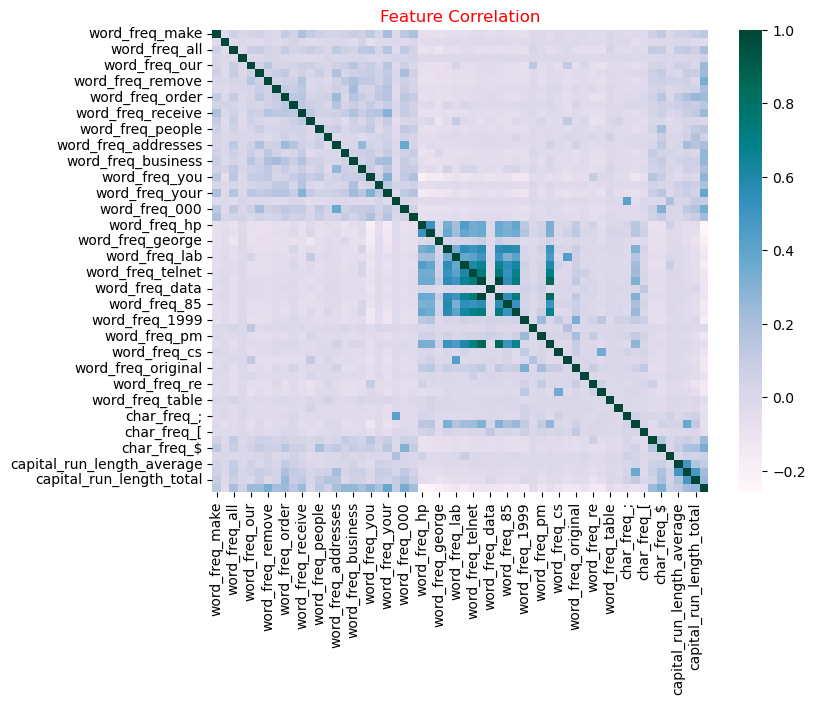

In [4]:
#Plot the feature corelation graph
plt.figure(figsize=(8,6))
sns.heatmap(spamData.corr(), cmap='PuBuGn')
plt.title('Feature Correlation', color='r')
plt.show()

In [5]:
#Check for null values
spamData.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [6]:
spamData.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [7]:
#Remove columns with 0 values in all rows
spamData = spamData.drop(labels=['word_freq_3d','char_freq_['], axis=1)
spamData
#Removed 2 columns

,word_freq_make,word_freq_address,word_freq_all,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.32,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.14,0.28,0.21,0.07,0.00,0.94,0.21,...,0.0,0.000,0.132,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,1.23,0.19,0.19,0.12,0.64,0.25,0.38,...,0.0,0.010,0.143,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.63,0.00,0.31,0.63,0.31,0.63,0.31,...,0.0,0.000,0.137,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.63,0.00,0.31,0.63,0.31,0.63,0.31,...,0.0,0.000,0.135,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.00,0.31,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.232,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.102,0.718,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.32,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.057,0.000,0.000,0.000,1.147,5,78,0


In [8]:
#Consider only first 55 features
X = spamData.iloc[:, :-1]
y = spamData.iloc[:, -1].values
print(X.shape)

(4601, 55)


In [9]:
#Drop duplicate values
spamData = pd.DataFrame(spamData).drop_duplicates()

In [10]:
spamData.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.32,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.000,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.14,0.28,0.21,0.07,0.00,0.94,0.21,...,0.0,0.00,0.132,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,1.23,0.19,0.19,0.12,0.64,0.25,0.38,...,0.0,0.01,0.143,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.63,0.00,0.31,0.63,0.31,0.63,0.31,...,0.0,0.00,0.137,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.63,0.00,0.31,0.63,0.31,0.63,0.31,...,0.0,0.00,0.135,0.135,0.000,0.000,3.537,40,191,1


In [11]:
#Check for spam and no spam count
spamData['spam'].value_counts()

0    2529
1    1679
Name: spam, dtype: int64

In [12]:
#Set 0 as no spam and spam as emails as 1 
# spamData.spam[spamData['spam'] == 1] ='spam'
# spamData.spam[spamData['spam'] == 0] ='No spam'

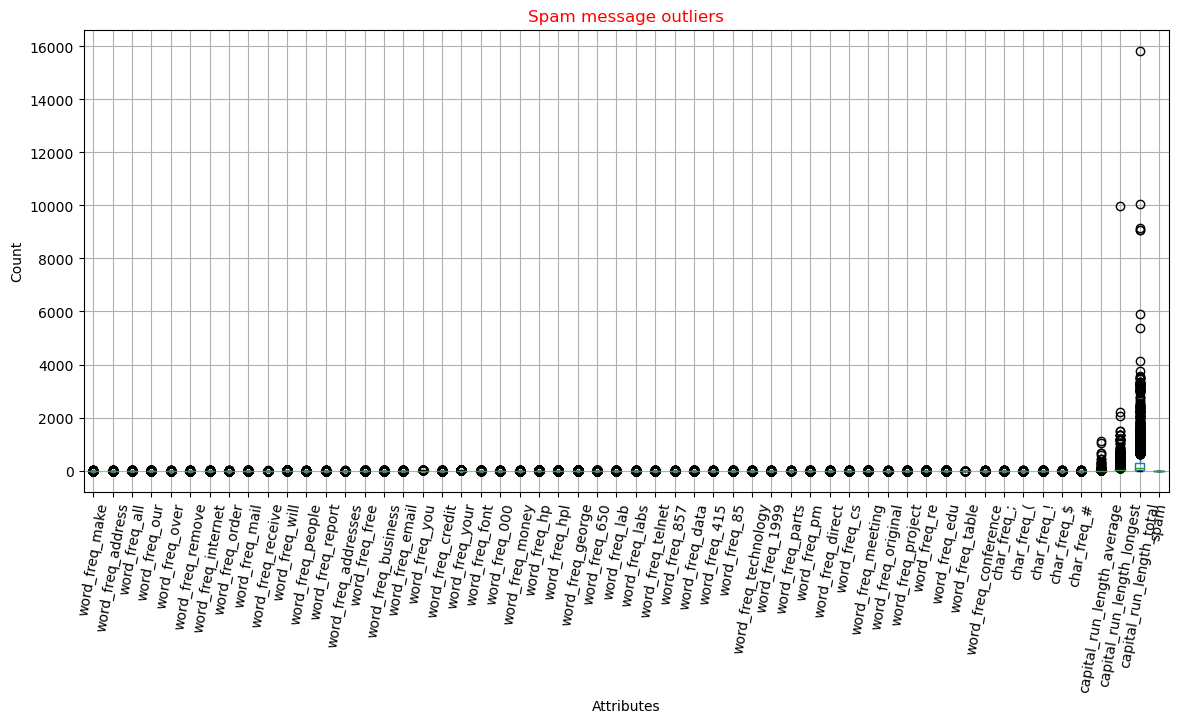

In [13]:
#Plot the outliers table 
plt.figure(figsize = (14,6))
chart = spamData.boxplot()
chart.set_xticklabels(chart.get_xticklabels(), rotation = 80)
plt.title("Spam message outliers", color ='red')
plt.xlabel('Attributes')
plt.ylabel('Count')
plt.show()

In [14]:
#Using IQR method setting the outliers as null values
for outlier in ["capital_run_length_average", "capital_run_length_longest", "capital_run_length_total"]:
    quart75, quart25 = np.percentile(spamData.loc[:,outlier], [75,25])
    IQR = quart75 - quart25
    max = quart75 + (1.5 * IQR)
    min = quart25 - (1.5 * IQR)
    spamData.loc[spamData[outlier] < min, outlier] = np.nan
    spamData.loc[spamData[outlier] > max, outlier] = np.nan  

In [15]:
#Drop null values in the dataset
spamData = spamData.dropna()
spamData

,word_freq_make,word_freq_address,word_freq_all,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.32,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.778,0.000,0.0,3.756,61.0,278.0,1
3,0.00,0.00,0.00,0.63,0.00,0.31,0.63,0.31,0.63,0.31,...,0.0,0.000,0.137,0.137,0.000,0.0,3.537,40.0,191.0,1
4,0.00,0.00,0.00,0.63,0.00,0.31,0.63,0.31,0.63,0.31,...,0.0,0.000,0.135,0.135,0.000,0.0,3.537,40.0,191.0,1
5,0.00,0.00,0.00,1.85,0.00,0.00,1.85,0.00,0.00,0.00,...,0.0,0.000,0.223,0.000,0.000,0.0,3.000,15.0,54.0,1
6,0.00,0.00,0.00,1.92,0.00,0.00,0.00,0.00,0.64,0.96,...,0.0,0.000,0.054,0.164,0.054,0.0,1.671,4.0,112.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.00,0.31,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.232,0.000,0.000,0.0,1.142,3.0,88.0,0
4597,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.353,0.000,0.0,1.555,4.0,14.0,0
4598,0.30,0.00,0.30,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.102,0.718,0.000,0.000,0.0,1.404,6.0,118.0,0
4599,0.96,0.00,0.00,0.32,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.057,0.000,0.000,0.0,1.147,5.0,78.0,0


In [16]:
#Applying feature scaling technique
scaler = StandardScaler()
scaledData = scaler.fit_transform(spamData.iloc[:, :-1])

In [17]:
#Normalize the data
spamScale = pd.DataFrame(data=scaledData, columns=spamData.iloc[:, :-1].columns)
spamScale

,word_freq_make,word_freq_address,word_freq_all,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,...,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,-0.306078,1.152810,0.701464,0.016590,-0.303393,-0.263263,-0.228889,-0.214934,-0.346124,-0.253274,...,-0.072973,-0.117434,-0.155392,-0.603680,0.685641,-0.266088,-0.073181,1.197805,2.264429,1.205293
1,-0.306078,-0.195432,-0.506042,0.458179,-0.303393,0.607327,1.269771,1.176985,0.737934,1.530522,...,-0.072973,-0.117434,-0.155392,-0.042572,-0.121616,-0.266088,-0.073181,1.009452,1.144425,0.538005
2,-0.306078,-0.195432,-0.506042,0.458179,-0.303393,0.607327,1.269771,1.176985,0.737934,1.530522,...,-0.072973,-0.117434,-0.155392,-0.050763,-0.124134,-0.266088,-0.073181,1.009452,1.144425,0.538005
3,-0.306078,-0.195432,-0.506042,2.196048,-0.303393,-0.263263,4.171938,-0.214934,-0.346124,-0.253274,...,-0.072973,-0.117434,-0.155392,0.309657,-0.294149,-0.266088,-0.073181,0.547601,-0.188913,-0.512782
4,-0.306078,-0.195432,-0.506042,2.295761,-0.303393,-0.263263,-0.228889,-0.214934,0.755141,5.270741,...,-0.072973,-0.117434,-0.155392,-0.382513,-0.087613,0.011883,-0.073181,-0.595417,-0.775581,-0.067923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3439,0.694447,-0.195432,0.663729,-0.439244,0.798995,-0.263263,-0.228889,-0.214934,-0.346124,-0.253274,...,-0.072973,-0.117434,-0.155392,0.346518,-0.294149,-0.266088,-0.073181,-1.050388,-0.828915,-0.252002
3440,-0.306078,-0.195432,-0.506042,-0.439244,-0.303393,-0.263263,-0.228889,-0.214934,-0.346124,-0.253274,...,-0.072973,-0.117434,-0.155392,-0.603680,0.150408,-0.266088,-0.073181,-0.695184,-0.775581,-0.819581
3441,0.662172,-0.195432,0.059976,-0.439244,-0.303393,-0.263263,-0.228889,-0.214934,-0.346124,-0.253274,...,-0.072973,-0.117434,0.319104,2.337017,-0.294149,-0.266088,-0.073181,-0.825053,-0.668914,-0.021903
3442,2.792323,-0.195432,-0.506042,0.016590,-0.303393,-0.263263,-0.228889,-0.214934,-0.346124,-0.253274,...,-0.072973,-0.117434,-0.155392,-0.370226,-0.294149,-0.266088,-0.073181,-1.046088,-0.722248,-0.328702


In [18]:
spamScale.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,...,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
count,3.444000e+03,3.444000e+03,3.444000e+03,3.444000e+03,3.444000e+03,3.444000e+03,3.444000e+03,3.444000e+03,3.444000e+03,3.444000e+03,...,3.444000e+03,3.444000e+03,3.444000e+03,3.444000e+03,3.444000e+03,3.444000e+03,3.444000e+03,3.444000e+03,3.444000e+03,3.444000e+03
mean,1.538258e-15,2.526209e-16,1.486712e-15,5.819709e-15,4.904033e-15,5.476552e-15,-3.746052e-15,2.402630e-15,4.893814e-16,3.971530e-15,...,5.805541e-16,-8.127532e-16,1.988876e-15,-5.680061e-16,-1.503467e-15,-3.827658e-15,-1.019139e-15,-3.590495e-16,-2.832938e-16,5.417334e-16
std,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,...,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00
min,-3.060785e-01,-1.954319e-01,-5.060419e-01,-4.392442e-01,-3.033932e-01,-2.632627e-01,-2.288894e-01,-2.149336e-01,-3.461239e-01,-2.532743e-01,...,-7.297345e-02,-1.174344e-01,-1.553924e-01,-6.036796e-01,-2.941492e-01,-2.660883e-01,-7.318139e-02,-1.172517e+00,-9.355820e-01,-9.192906e-01
25%,-3.060785e-01,-1.954319e-01,-5.060419e-01,-4.392442e-01,-3.033932e-01,-2.632627e-01,-2.288894e-01,-2.149336e-01,-3.461239e-01,-2.532743e-01,...,-7.297345e-02,-1.174344e-01,-1.553924e-01,-6.036796e-01,-2.941492e-01,-2.660883e-01,-7.318139e-02,-7.343167e-01,-7.222479e-01,-6.891912e-01
50%,-3.060785e-01,-1.954319e-01,-5.060419e-01,-4.392442e-01,-3.033932e-01,-2.632627e-01,-2.288894e-01,-2.149336e-01,-3.461239e-01,-2.532743e-01,...,-7.297345e-02,-1.174344e-01,-1.553924e-01,-3.333649e-01,-2.941492e-01,-2.660883e-01,-7.318139e-02,-2.647247e-01,-3.489133e-01,-3.440422e-01
75%,-3.060785e-01,-1.954319e-01,1.731801e-01,7.356929e-02,-3.033932e-01,-2.632627e-01,-2.288894e-01,-2.149336e-01,-3.461239e-01,-2.532743e-01,...,-7.297345e-02,-1.174344e-01,-1.553924e-01,2.318387e-01,4.636340e-03,-2.660883e-01,-7.318139e-02,4.701953e-01,2.510887e-01,2.638036e-01
max,1.434678e+01,2.988721e+01,9.116270e+00,1.380558e+01,2.060642e+01,2.015346e+01,2.619986e+01,2.340278e+01,1.877115e+01,1.476514e+01,...,2.530467e+01,3.050372e+01,2.024330e+01,2.100921e+01,4.060767e+01,3.063500e+01,4.305673e+01,3.834745e+00,4.237769e+00,3.851436e+00


In [19]:
#Apllying the PCA technique
pca = PCA()
pcaComp = pca.fit_transform(spamScale)

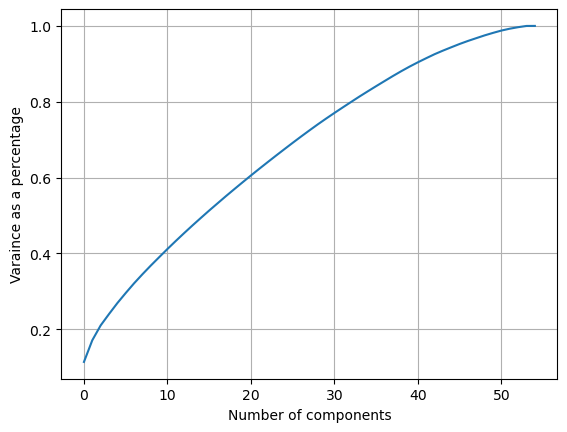

In [20]:
#Plot the variance graph
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of components")
plt.ylabel("Varaince as a percentage")
plt.grid(True)
plt.show()

In [21]:
#Applying PCA for the first 44 atrributes
pca = PCA(0.95)
data = pca.fit_transform(spamScale)
PDF = pd.DataFrame(data)
PDF

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
0,-1.002909,1.801581,0.720301,0.060234,-0.229496,-0.021884,-1.193400,-0.893058,1.075688,0.857376,...,-0.020861,0.213845,-0.122592,0.046964,-0.531428,-0.298512,-5.161957e-01,-0.064587,-0.264534,-0.033269
1,-0.981264,1.536536,0.302672,-0.019248,-0.300073,-0.164518,-0.693837,0.221213,-0.369803,-0.196664,...,-0.837438,0.331048,-0.153501,0.057863,0.334492,-0.523711,-6.022822e-01,0.142793,-0.318594,-0.495607
2,-0.982511,1.536219,0.302084,-0.018471,-0.300258,-0.163976,-0.694451,0.220345,-0.370229,-0.198282,...,-0.838954,0.332783,-0.151207,0.057339,0.333859,-0.523281,-6.015983e-01,0.143526,-0.319611,-0.495117
3,-0.586173,-0.154730,0.007288,0.328955,-0.658308,-0.393302,0.167260,0.773885,-1.263520,-0.046210,...,-0.941317,1.390597,0.406119,-0.698592,0.293293,-0.492845,-8.580428e-01,0.310532,-0.546626,-0.692058
4,-1.142722,0.746592,-1.666753,0.792670,0.066630,1.535707,-1.329789,-0.171241,-0.231543,-0.649398,...,0.085665,0.283598,0.410171,1.163534,-0.401385,0.429762,3.988103e-07,0.661365,-0.129761,-0.030329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3439,-0.538435,-1.336285,-0.499813,0.433783,-0.278996,-0.484276,0.159815,0.128413,0.281065,-0.856754,...,-0.216192,-0.538882,0.253374,-0.370425,0.152924,0.349735,7.102274e-02,0.216640,0.069263,0.151079
3440,-0.930797,-1.006172,-1.234032,-0.262919,1.515879,-0.261191,-0.066180,0.803211,0.851632,-0.699078,...,1.032704,0.705123,-0.977444,0.132616,0.156626,-0.042521,-4.512108e-01,-0.079813,0.307979,-0.232032
3441,-0.275936,-0.874727,-0.111813,0.050074,0.126311,-0.172827,0.126804,-0.203772,1.221418,-0.936170,...,0.559103,-0.878925,-0.691340,-0.561489,0.163478,0.021461,-6.619355e-01,-0.556026,0.140657,-0.079767
3442,-0.710135,-1.140638,-0.792458,0.268457,0.323446,-0.323563,-0.129578,0.217626,0.394595,-0.445752,...,-0.145228,0.396841,-0.442717,-0.204236,-0.242400,-0.135750,1.013148e-02,0.269803,0.294738,0.111173


In [22]:
#Splitting the dataset as train and test
X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, test_size=0.25, random_state=0)

In [23]:
#Store the train, test values in arrays
neighbors = np.arange(1,9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [24]:
#Building the KNN model
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
    knn.fit(X_Train, y_Train)
    train_accuracy[i] = knn.score(X_Train, y_Train)
    test_accuracy[i] = knn.score(X_Test, y_Test)   

In [25]:
#Prediction for KNN
yPrediction = knn.predict(X_Test)

              Spam (1)  Not spam (0)
Spam (1)           603            88
Not spam (0)       126           334


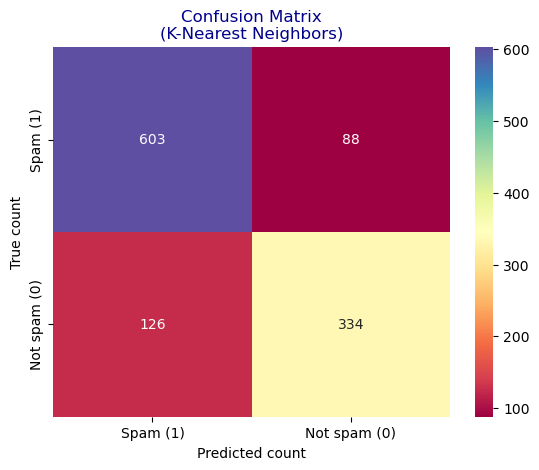

In [26]:
#Plot confusionn matrix for KNN
matrix = pd.DataFrame((metrics.confusion_matrix(y_Test, yPrediction)), ('Spam (1)', 'Not spam (0)'), ('Spam (1)', 'Not spam (0)'))
print(matrix)

#Plot confusion matrix in a graph for knn
heatmap = sns.heatmap(matrix, annot = True, fmt = 'd', cmap = 'Spectral')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels())
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels())

plt.title('Confusion Matrix\n(K-Nearest Neighbors)', color = 'darkblue')
plt.ylabel('True count')
plt.xlabel('Predicted count')
plt.show()

In [27]:
#Classification report for KNN
classificationReport = classification_report(y_Test, yPrediction)
print("Classification Report: \n", classificationReport)

Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       691
           1       0.79      0.73      0.76       460

    accuracy                           0.81      1151
   macro avg       0.81      0.80      0.80      1151
weighted avg       0.81      0.81      0.81      1151



In [28]:
# Getting the final acuaracy result of KNN with PCA
trainPred = knn.predict(X_Test)
accuracy = metrics.accuracy_score(y_Test, trainPred)
print("***KNN accuracy***: {:.4%}".format(accuracy))

***KNN accuracy***: 81.4075%


In [29]:
#Build the Decision Tree model
DT = DecisionTreeClassifier(criterion='gini', max_depth=5)

In [30]:
#Prediction for DT
DT.fit(X_Train, y_Train)
yPredict = DT.predict(X_Test)

              Spam (1)  Not spam (0)
Spam (1)           654            37
Not spam (0)        81           379


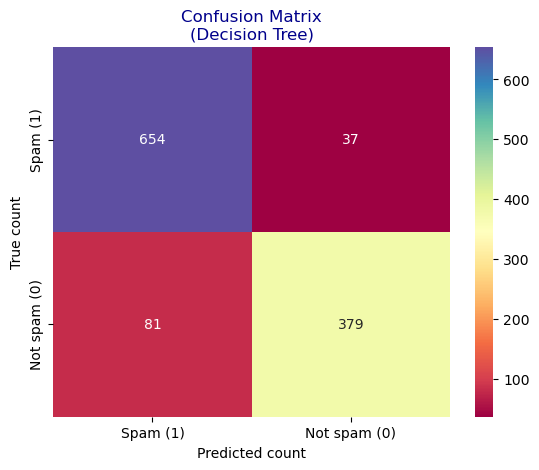

In [31]:
#Plot confusionn matrix for DT
matrix = pd.DataFrame((metrics.confusion_matrix(y_Test, yPredict)), ('Spam (1)', 'Not spam (0)'), ('Spam (1)', 'Not spam (0)'))
print(matrix)

#Plot confusion matrix in a graph for DT
heatmap = sns.heatmap(matrix, annot = True, fmt = 'd', cmap = 'Spectral')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels())
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels())

plt.title('Confusion Matrix\n(Decision Tree)', color = 'darkblue')
plt.ylabel('True count')
plt.xlabel('Predicted count')
plt.show()

In [32]:
#Classification report for DT
classificationReport = classification_report(y_Test, yPredict)
print("Classification Report:\n", classificationReport)

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.95      0.92       691
           1       0.91      0.82      0.87       460

    accuracy                           0.90      1151
   macro avg       0.90      0.89      0.89      1151
weighted avg       0.90      0.90      0.90      1151



In [33]:
# hyperparameter to avoid prunning in decision tree
# Using three parameters
parameters = {"max_depth": [2, 4, 6, 8, 10], "min_samples_split": [2, 4, 6, 8, 10], "min_samples_leaf": [1, 2, 3, 4, 5]}

# Usek grid search instance to obtain the best hyperparameters
gridSearch = GridSearchCV(DT, parameters, cv=5)
gridSearch.fit(X_Train, y_Train)

#Accuracy by using hyper paramter tuning
print("Hyperparameter values: ", gridSearch.best_params_)
print("Best accuracy score: ", gridSearch.best_score_)

Hyperparameter values:  {'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best accuracy score:  0.9194202898550724


In [34]:
predTrain = DT.score(X_Train, y_Train)
print("***Decision Tree (Train accuracy)***: {:.4%}".format(predTrain))

***Decision Tree (Train accuracy)***: 92.4058%


In [35]:
# Getting the final acuaracy result of DT with PCA
DT = gridSearch
accuracy =  DT.score(X_Test, y_Test)
print("***Decision Tree accuarcy***: {:.4%}".format(accuracy))

***Decision Tree accuarcy***: 89.9218%


In [36]:
DTProb = DT.predict_proba(X_Test)[:, 1]
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_Test, DTProb)

In [37]:
aucScoreDT = auc(fpr_dt, tpr_dt)
# print(aucScoreDT)

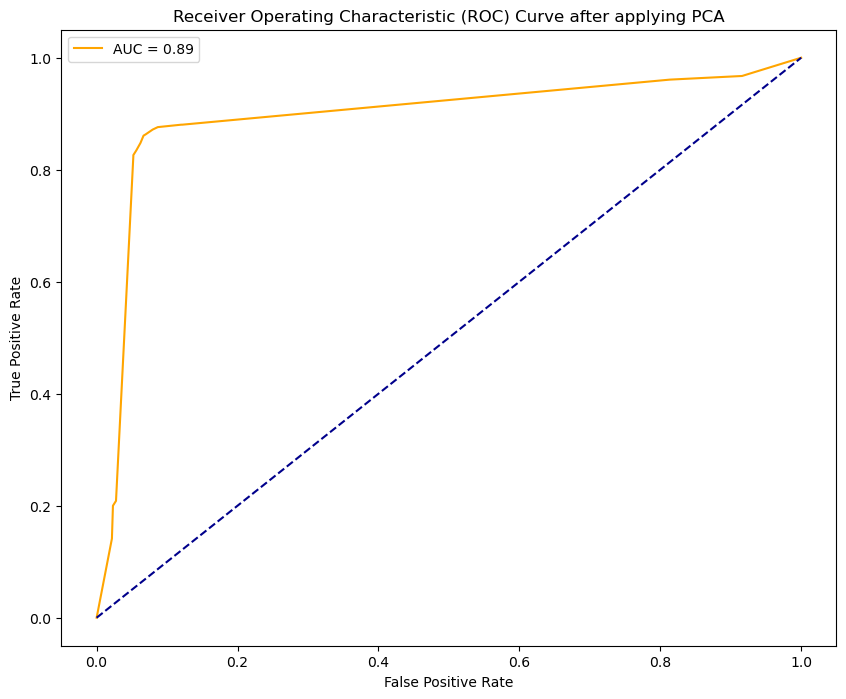

In [38]:
def plt_roc_curve(fpr_dt, tpr_dt):
    plt.figure(figsize=(10,8))
    plt.plot(fpr_dt, tpr_dt, color='orange', label='AUC = %0.2f' % aucScoreDT)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve after applying PCA')
    plt.legend()
    plt.show()
plt_roc_curve(fpr_dt, tpr_dt)

In [39]:
#------------------------------------------------------------------------------#

In [40]:
#---------Obtaining the KNN and DT accuracy without applying PCA--------------#

In [41]:
scaler=StandardScaler()
scaled_data=scaler.fit_transform(spamData)

In [42]:
spamData=pd.DataFrame(data=scaled_data, columns= spamData.columns)

In [43]:
spamData['spam'] = spamData['spam'].astype('category').cat.codes
#split data train and test
X = spamData.iloc[:, :-1]
y = spamData.iloc[:, -1].values
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [44]:
#Feature extraction
sc = scaler
XTrain = sc.fit_transform(XTrain)
XTest = sc.fit_transform(XTest)

In [45]:
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn.fit(XTrain, yTrain)

KNeighborsClassifier()

In [46]:
#Prediction for KNN
knnPredict = knn.predict(XTest)

              Spam (1)  Not spam (0)
Spam (1)           551            25
Not spam (0)        50           235


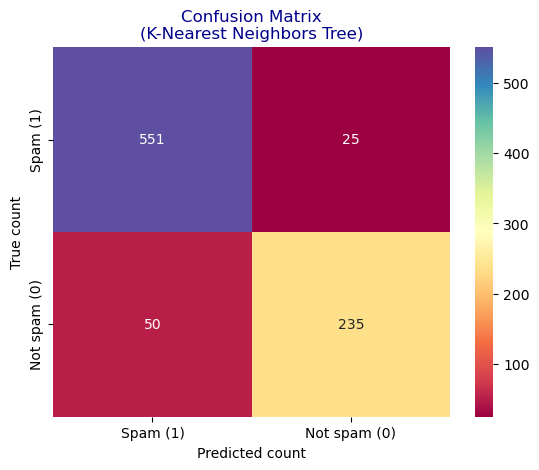

In [47]:
#Plot confusionn matrix for KNN without applying PCA
matrix = pd.DataFrame((metrics.confusion_matrix(yTest, knnPredict)), ('Spam (1)', 'Not spam (0)'), ('Spam (1)', 'Not spam (0)'))
print(matrix)

#Plot confusion matrix in a graph for KNN
heatmap = sns.heatmap(matrix, annot = True, fmt = 'd', cmap = 'Spectral')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels())
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels())

plt.title('Confusion Matrix\n(K-Nearest Neighbors Tree)', color = 'darkblue')
plt.ylabel('True count')
plt.xlabel('Predicted count')
plt.show()

In [48]:
#Classification report for KNN without applying PCA
classReport = classification_report(yTest, knnPredict)
print("Classification Report: \n", classReport)

Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.96      0.94       576
           1       0.90      0.82      0.86       285

    accuracy                           0.91       861
   macro avg       0.91      0.89      0.90       861
weighted avg       0.91      0.91      0.91       861



In [49]:
# Getting the final acuaracy result of KNN without applying PCA
knnTrainPred = knn.predict(XTest)
accuracy = metrics.accuracy_score(yTest, knnTrainPred)
print("***KNN accuracy***: {:.4%}".format(accuracy))

***KNN accuracy***: 91.2892%


In [50]:
#Build the Decision Tree model
dt = DecisionTreeClassifier(criterion='gini', max_depth=5)

In [51]:
#Prediction for DT
dt.fit(XTrain, yTrain)
DTyPredict = dt.predict(XTest)

          Spam  Not spam
Spam       529        47
Not spam    54       231


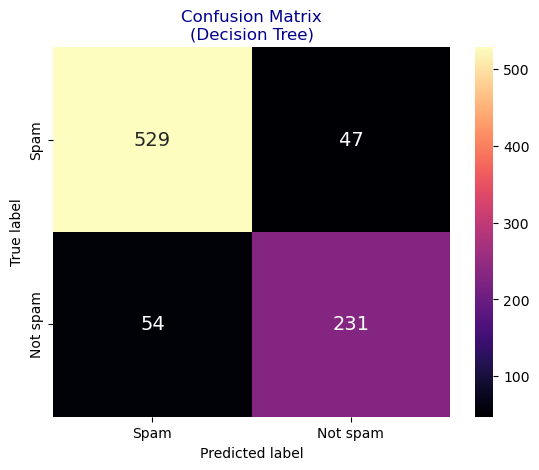

In [52]:
#Confusionn matrix for DT without applying PCA
matrix = pd.DataFrame((metrics.confusion_matrix(yTest, DTyPredict)), ('Spam', 'Not spam'), ('Spam', 'Not spam'))
print(matrix)

heatmap = sns.heatmap(matrix, annot = True, annot_kws = {'size': 14}, fmt = 'd', cmap = 'magma')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels())
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels())

plt.title('Confusion Matrix\n(Decision Tree)', color = 'darkblue')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [53]:
#Classification report of DT without applying PCA
DTclsReport = classification_report(yTest, DTyPredict)
print("Classification Report: \n", DTclsReport)

Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.92      0.91       576
           1       0.83      0.81      0.82       285

    accuracy                           0.88       861
   macro avg       0.87      0.86      0.87       861
weighted avg       0.88      0.88      0.88       861



In [54]:
# hyperparameter to avoid prunning in decision tree
# Using three parameters
parameters = {"max_depth": [2, 4, 6, 8, 10], "min_samples_split": [2, 4, 6, 8, 10], "min_samples_leaf": [1, 2, 3, 4, 5]}

# Usek grid search instance to obtain the best hyperparameters
gridSearch = GridSearchCV(dt, parameters, cv=5)
gridSearch.fit(XTrain, yTrain)

#Accuracy by using hyper paramter tuning
print("Hyperparameter values: ", gridSearch.best_params_)
print("Best accuracy score: ", gridSearch.best_score_)

Hyperparameter values:  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best accuracy score:  0.9008839008591606


In [55]:
predTrain = DT.score(XTrain, yTrain)
print("***Decision Tree (Train accuracy)***: {:.4%}".format(predTrain))

***Decision Tree (Train accuracy)***: 78.2811%


C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [56]:
# Getting the final acuaracy result of DT with PCA
dt = gridSearch
accuracy =  dt.score(XTest, yTest)
print("***Decision Tree accuarcy***: {:.4%}".format(accuracy))

***Decision Tree accuarcy***: 89.8955%


In [57]:
DTProb = DT.predict_proba(XTest)[:, 1]
fpr_dt, tpr_dt, thresholds_dt = roc_curve(yTest, DTProb)

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [58]:
aucScoreDT = auc(fpr_dt, tpr_dt)
# print(aucScoreDT)

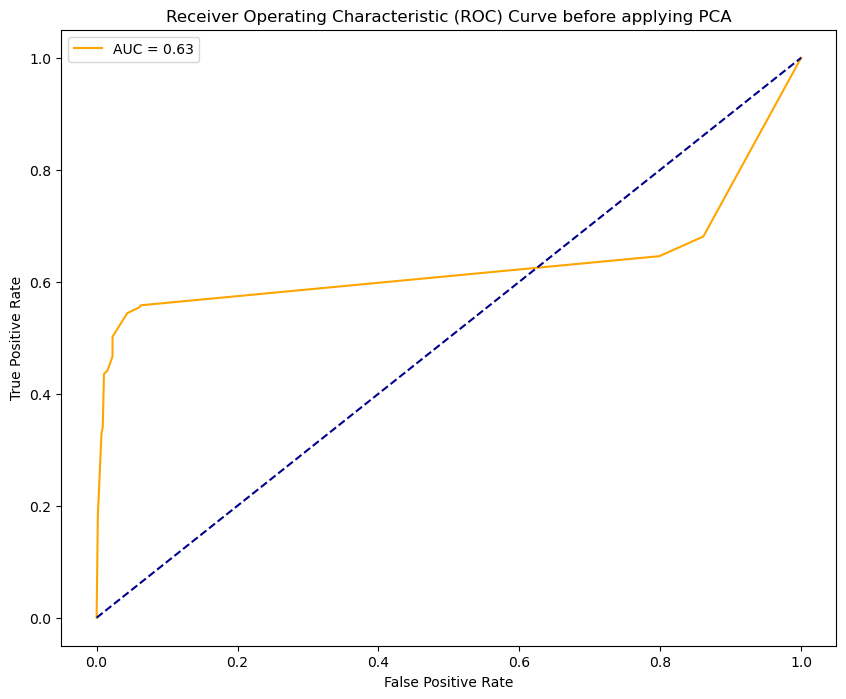

In [59]:
def plt_roc_curve(fpr_dt, tpr_dt):
    plt.figure(figsize=(10,8))
    plt.plot(fpr_dt, tpr_dt, color='orange', label='AUC = %0.2f' % aucScoreDT)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve before applying PCA')
    plt.legend()
    plt.show()
plt_roc_curve(fpr_dt, tpr_dt)